In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [3]:
t_end=6e8 * s
init=State(x1=1e12*m,
           y1=-1e11*m,
           vx1=0*m/s,
           vy1=2000*m/s,
           x2=-1e12*m,
           y2=1e11*m,
           vx2=0*m/s,
           vy2=-2000*m/s)
system = System(init=init, 
                m1=1.989e30*kg, 
                m2=1.989e30*kg, 
                G=6.67e-11*m*m*m/(kg*s*s), 
                t_end=t_end)
init

,values
x1,1000000000000.0 meter
y1,-100000000000.0 meter
vx1,0.0 meter / second
vy1,2000.0 meter / second
x2,-1000000000000.0 meter
y2,100000000000.0 meter
vx2,0.0 meter / second
vy2,-2000.0 meter / second


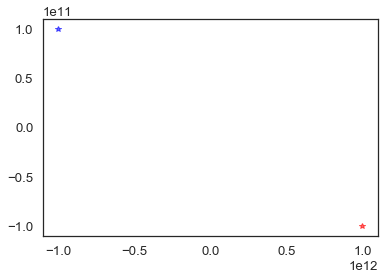

In [4]:
plot(init.x1,init.y1,'*',color='red')
plot(init.x2,init.y2,'*',color='blue')

In [5]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,vx1,vy1,x2,y2,vx2,vy2 = state
    unpack(system)
    velocity1=Vector(vx1,vy1)
    position1=Vector(x1,y1)
    velocity2=Vector(vx2,vy2)
    position2=Vector(x2,y2)
    r=sqrt((x1-x2)**2+(y1-y2)**2)
    force=-G*m1*m2/(r**2)

    acceleration1=force/m1
    acceleration2=force/m2
    dx1dt=vx1
    dy1dt=vy1
    dx2dt=vx2
    dy2dt=vy2
    theta1=position1.angle
    theta2=position2.angle
    dvx1dt,dvy1dt=pol2cart(theta1,acceleration1)
    dvx2dt,dvy2dt=pol2cart(theta2,acceleration2)
#     dvx1dt=acceleration1*np.cos(theta1)
#     dvy1dt=acceleration1*np.sin(theta1)
#     dvx2dt=acceleration2*np.cos(theta2)
#     dvy2dt=acceleration2*np.sin(theta2)
    

    
    return dx1dt,dy1dt,dvx1dt,dvy1dt,dx2dt,dy2dt,dvx2dt,dvy2dt

In [6]:
results, details = run_ode_solver(system, slope_func,max_step=1e6)
details

,values
sol,None
t_events,[]
nfev,3644
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


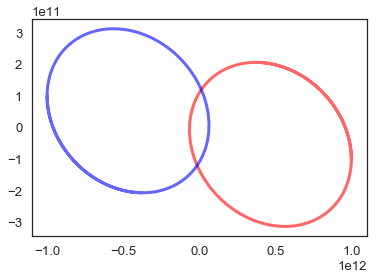

In [7]:
plot(results.x1,results.y1,'red')
plot(results.x2,results.y2,'blue')

In [8]:
slope_func(init,0,system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(2000.0, 'meter / second')>,
 <Quantity(-3.267522336325631e-05, 'meter / second ** 2')>,
 <Quantity(3.267522336325631e-06, 'meter / second ** 2')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-2000.0, 'meter / second')>,
 <Quantity(3.267522336325631e-05, 'meter / second ** 2')>,
 <Quantity(-3.2675223363256293e-06, 'meter / second ** 2')>)

In [9]:
pol2cart(pi,100)

(-100.0, 1.2246467991473532e-14)

In [10]:
from mpl_toolkits.mplot3d import Axes3D

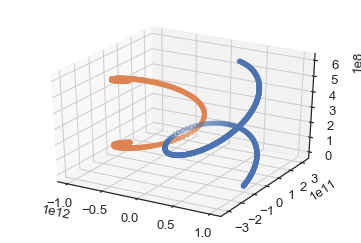

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.scatter(results.x1, results.y1, results.index)
ax.scatter(results.x2, results.y2, results.index)
plt.show()
